In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


#                                          EDA - VIDEO GAME SALES 🎮

![](https://discovertemplate.com/wp-content/uploads/2020/10/DT_G44_Video-Game-Animated-GIF-Icon-pack.gif)

## The following topics are covered in this project:

- Data Importing and Understanding
- Data preparation and cleaning
- Exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

# Description of Dataset

### This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.
Fields include

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.


# Objective

Data analysis can be divided into two fields: Hypothesis Generation and Hypothesis Confirmation (also known as confirmatory analysis). For this project, I will focus solely on exploratory analysis. The objective of exploratory analysis is to comprehend how the data is distributed and extract insights for future decision-making. The analysis aims to thoroughly investigate the data in a clear, simple, and informative manner. The data utilized in this project is limited to information spanning from 1980 to 2016. The following outlines all the stages of the analysis presented in these notebooks, following a logical and intuitive sequence to facilitate understanding of the data.

# Data Importing and Understanding

In [90]:
df=pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

In [91]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [92]:
df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9702,9704,Guilty Gear X,PS2,2001.0,Fighting,Sammy Corporation,0.06,0.05,0.00,0.02,0.12
13988,13990,Legasista,PS3,2012.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.04,0.00,0.04
7692,7694,Looney Tunes: Space Race,PS2,2002.0,Racing,Infogrames,0.10,0.08,0.00,0.03,0.20
3739,3741,Hello Kitty: Big City Dreams,DS,2008.0,Puzzle,Empire Interactive,0.42,0.08,0.00,0.04,0.54
559,560,Skate 3,X360,2010.0,Sports,Electronic Arts,1.46,0.98,0.00,0.24,2.68
7780,7782,Space Invaders Extreme 2,DS,2009.0,Shooter,Square Enix,0.17,0.01,0.00,0.01,0.19
9651,9653,Adventures to Go!,PSP,2008.0,Role-Playing,Zushi Games,0.10,0.00,0.01,0.01,0.13
8477,8479,World Tour Soccer 2005,PS2,2004.0,Sports,Sony Computer Entertainment,0.08,0.06,0.00,0.02,0.16
7717,7719,UFC: Tapout,XB,2002.0,Fighting,Crave Entertainment,0.14,0.05,0.00,0.01,0.20
1947,1949,NBA Street V3,PS2,2005.0,Sports,Electronic Arts,0.52,0.41,0.00,0.14,1.06


#### Checking information about datatypes

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [94]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [95]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Insights:
- year data from 1980 to 2020
- 271 missing values in year and 58 in publisher
- NA_Sales- max-41.49 
- EU_Sales- max-29.02
- JP_Sales- max-10.22
- Global_sales- max-82.74


# Data Preprocessing and cleaning


In [96]:
df.Name.value_counts()

Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: Name, Length: 11493, dtype: int64

In [97]:
df.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [98]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [99]:
df.shape

(16598, 11)

In [100]:
final=df.dropna()
final.shape

(16291, 11)

### Insights: 
- We check out all unique value counts in respect of Year, Genre,Name 
- we have removed missing values from the dataset 

# Exploratory analysis and visualization

In [101]:
# Importing visualization library
import matplotlib.pyplot as plt

# Task

1. What are the different measures of frequency distribution of year trends ?
2. What are the sales analysis- top 5 games in north amereica, europe, japan and globaly?
3. What are the Genre distribution ? 
4. Who are the top most publisher, and global sales number per year?

## 1.What are the different measures of frequency distribution of year trends ?

In [102]:
Years=df['Year'].value_counts().sort_values(ascending=False)
Years.head(10)

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
Name: Year, dtype: int64

Text(0.5, 1.0, '10 most frequent Years')

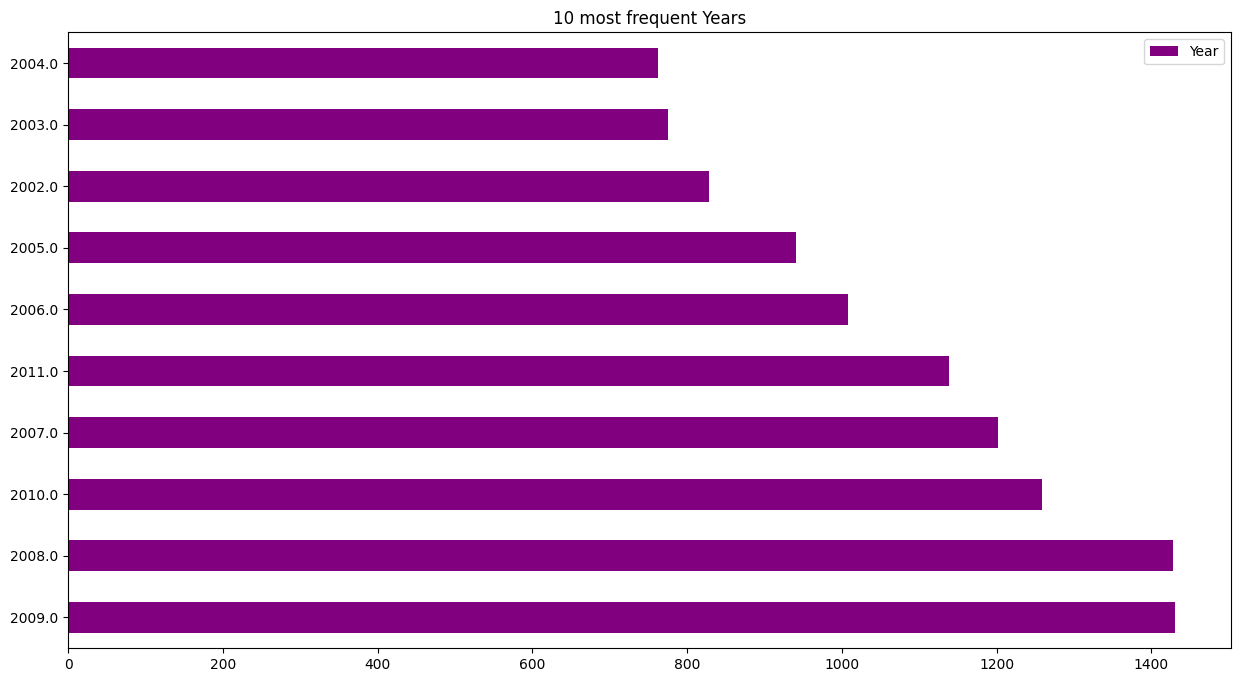

In [103]:

Years.head(10).to_frame().plot(kind='barh',color='purple',figsize=(15,8))
plt.title("10 most frequent Years" )

Text(0.5, 1.0, '10 least frequent Years')

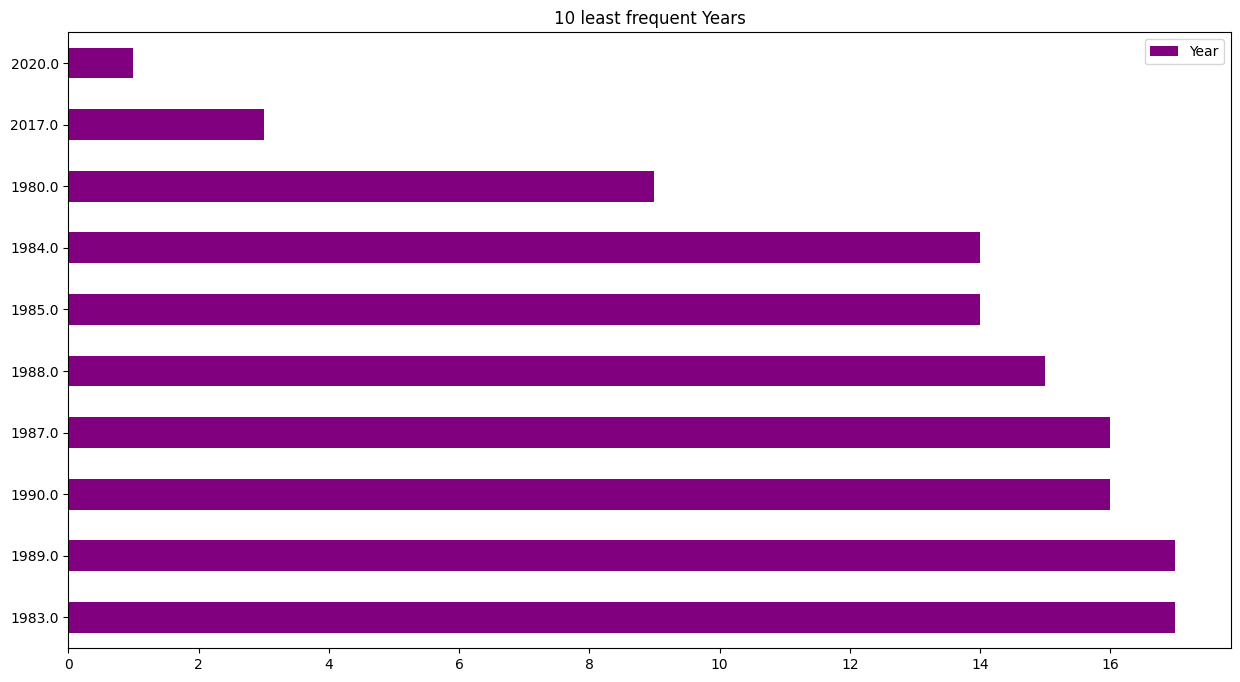

In [104]:

Years.tail(10).to_frame().plot(kind='barh',color='purple',figsize=(15,8))
plt.title("10 least frequent Years" )

Text(0.5, 1.0, 'Year trends')

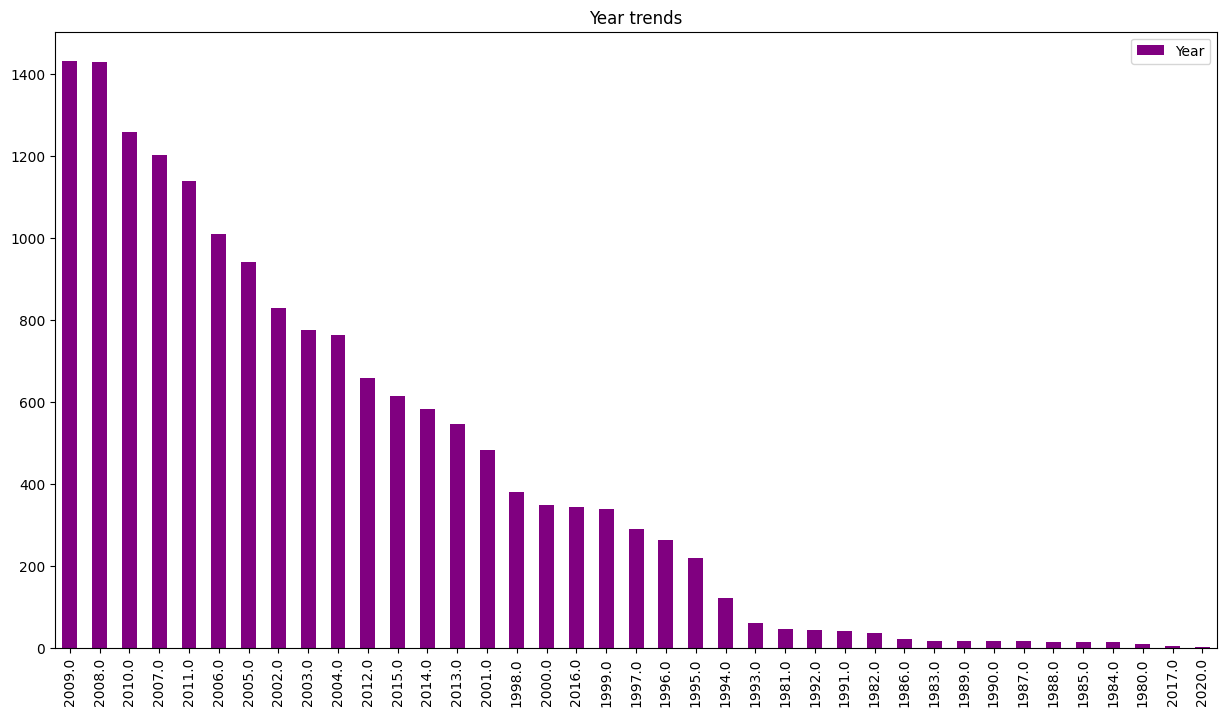

In [125]:
Years.to_frame().plot(kind='bar',color='purple',figsize=(15,8))
plt.title("Year trends" )


Insights:
- highest frequency in  2009- 1431 than in 2008- 1428.
- Least frequency in 2020 than 2017
- Year wise frequency distribution

# 2. What are the sales analysis- top 5 games in north amereica, europe, japan and globaly?

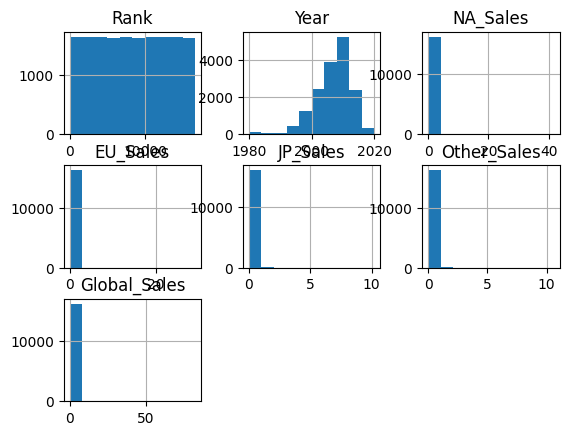

In [106]:
sales = pd.DataFrame(final, columns = ['Rank','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'] )
sales.hist()
plt.show()

<AxesSubplot: xlabel='Name'>

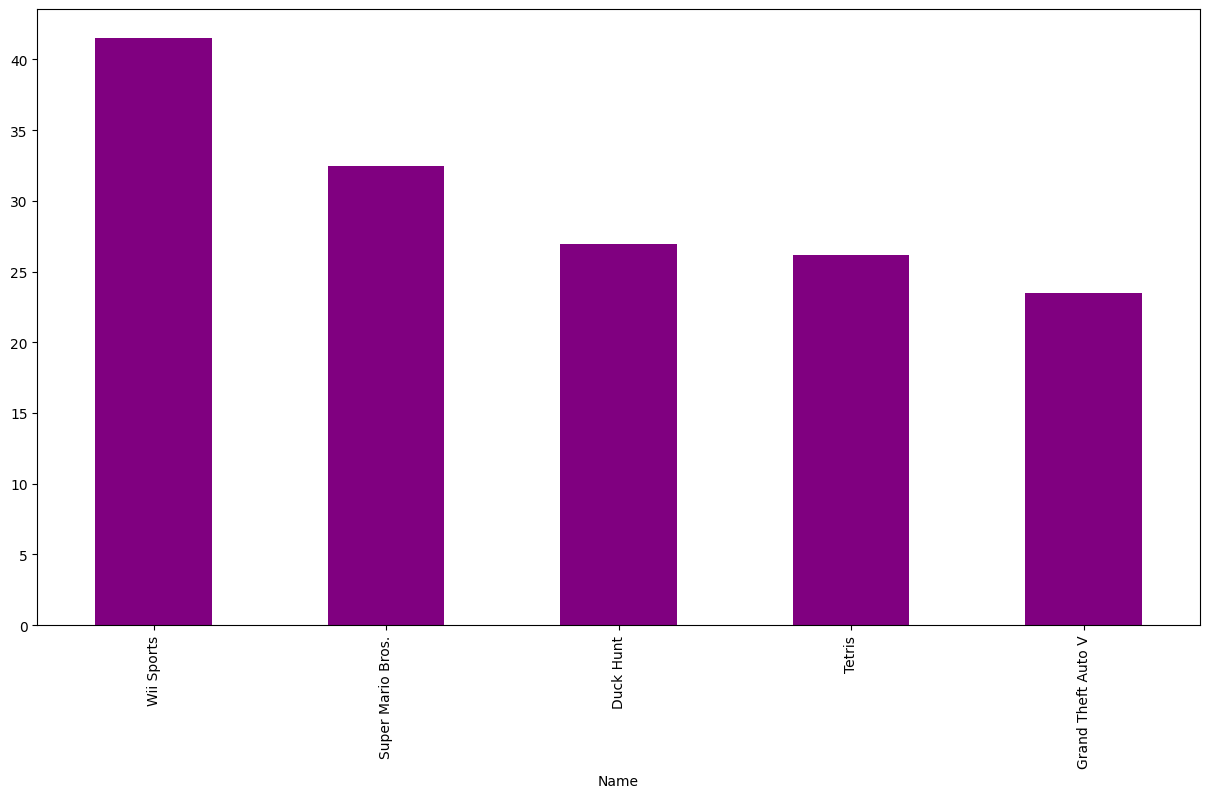

In [107]:
# NA_Sales=final.NA_Sales.sort_values(ascending=False)
# NA_Sales.head(10)

NA_Sales=df.groupby(['Name']) ['NA_Sales'].sum().sort_values(ascending=False)
NA_Sales.head(5).plot(kind='bar',color='purple',figsize=(15,8))

<AxesSubplot: xlabel='Name'>

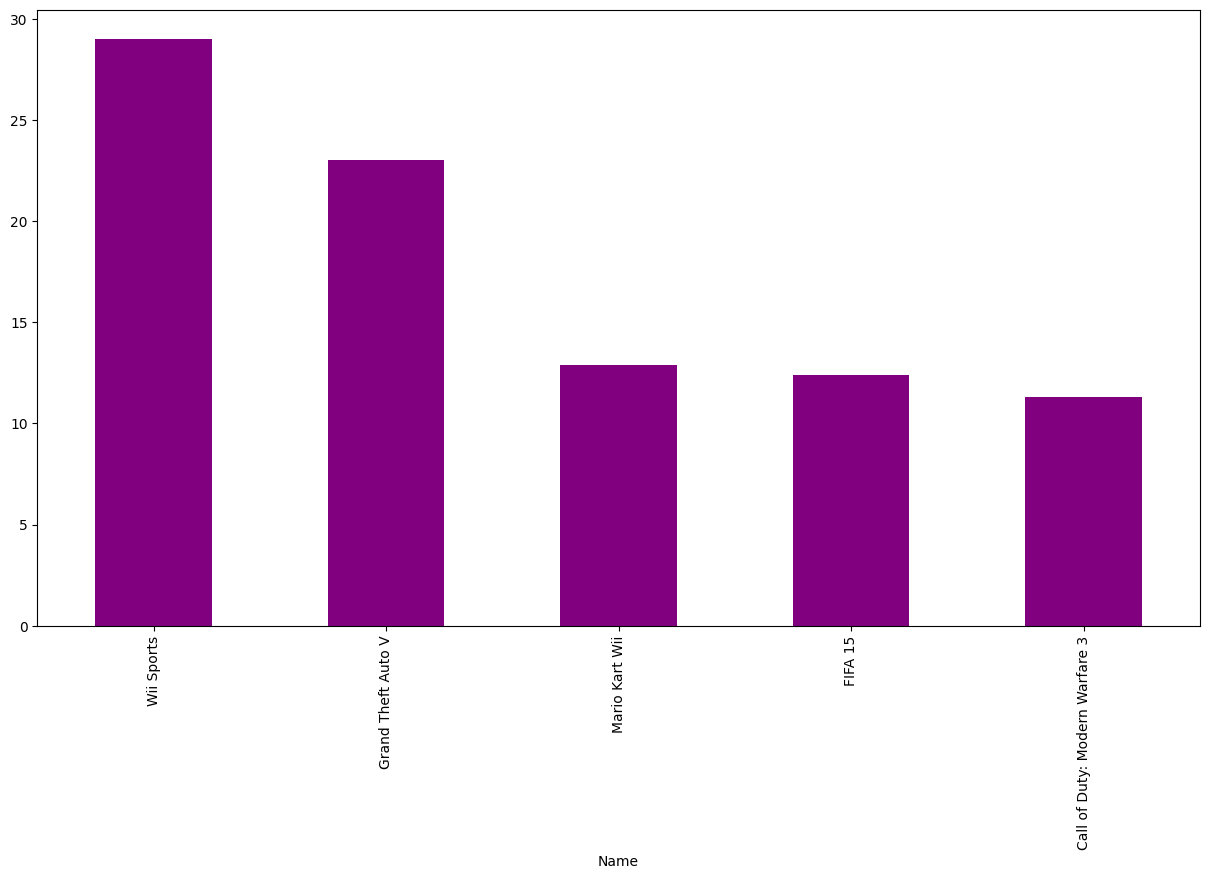

In [108]:
EU_Sales=df.groupby(['Name']) ['EU_Sales'].sum().sort_values(ascending=False)
EU_Sales.head(5).plot(kind='bar',color='purple',figsize=(15,8))

In [109]:
final.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

<AxesSubplot: xlabel='Name'>

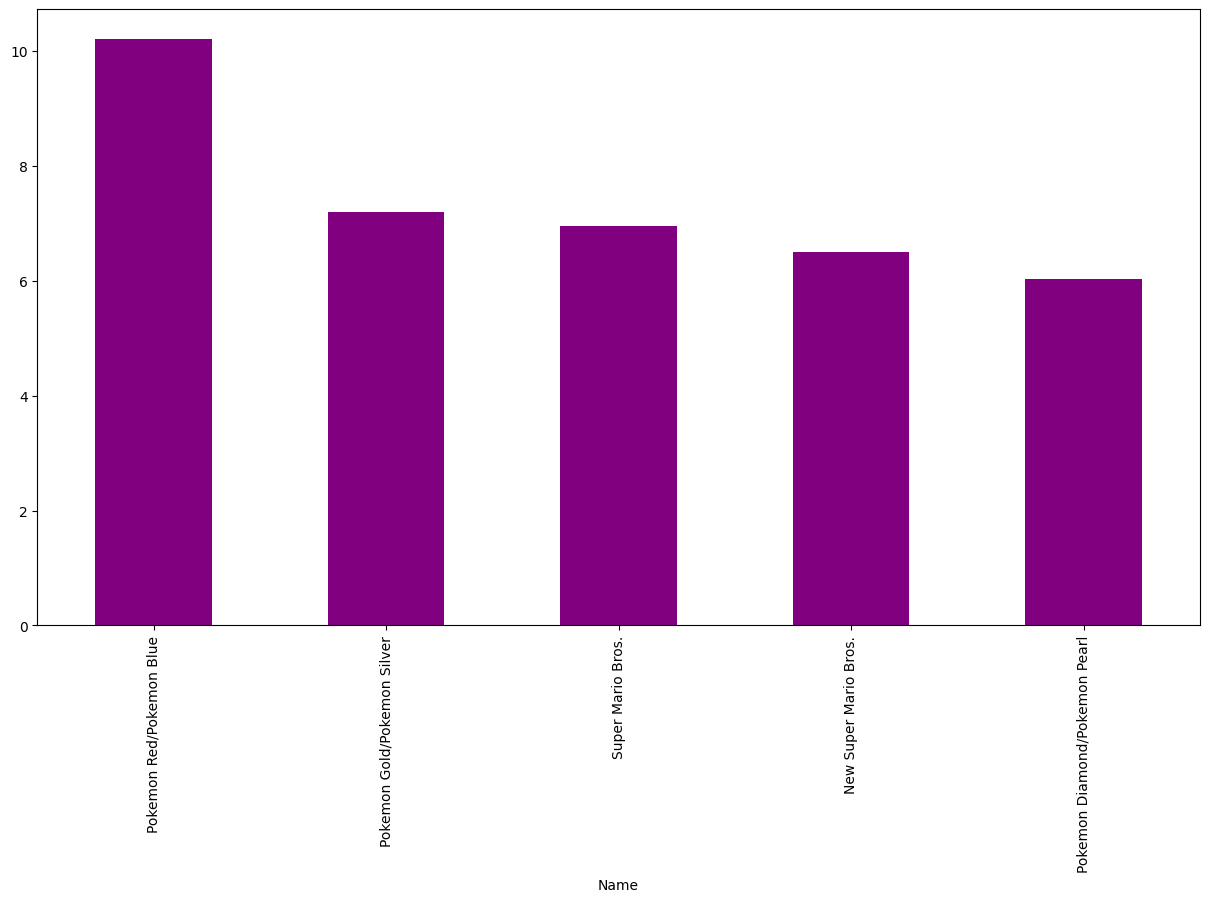

In [110]:
JP_Sales=df.groupby(['Name']) ['JP_Sales'].sum().sort_values(ascending=False)
JP_Sales.head(5).plot(kind='bar',color='purple',figsize=(15,8))

<AxesSubplot: xlabel='Name'>

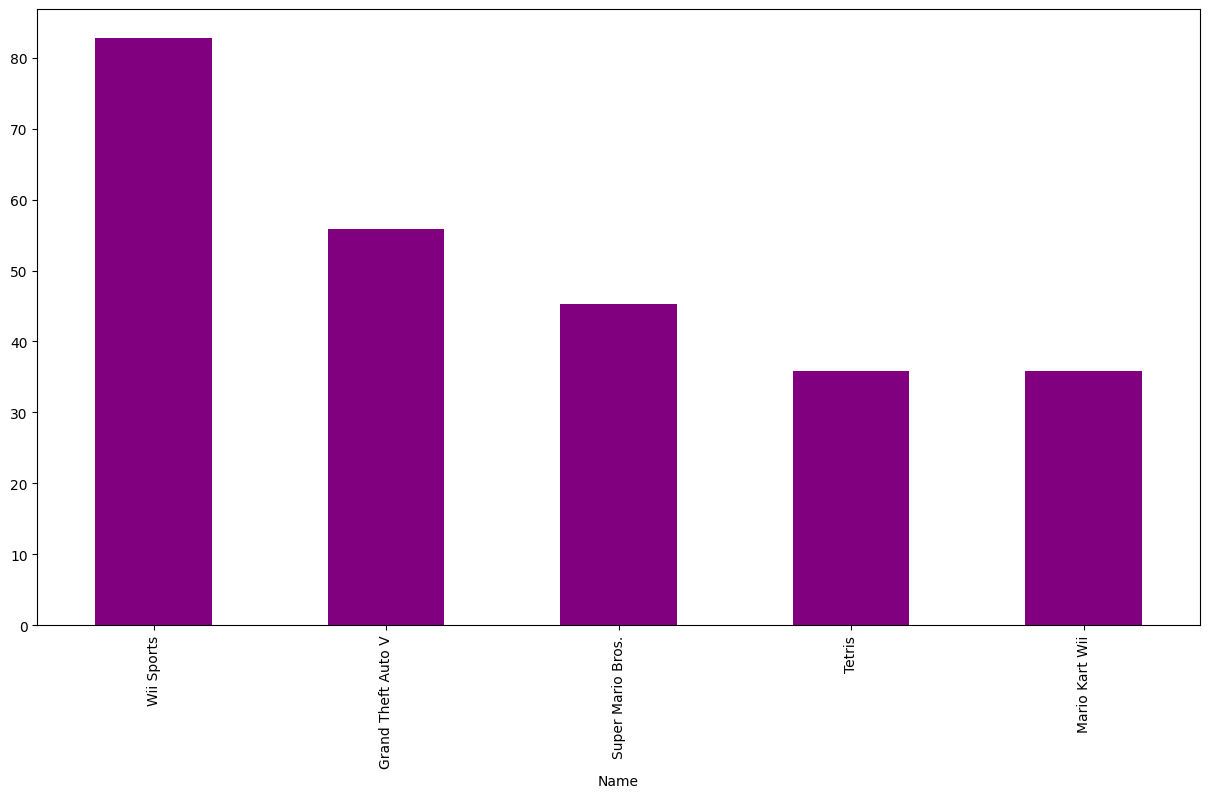

In [111]:
Global_Sales=df.groupby(['Name']) ['Global_Sales'].sum().sort_values(ascending=False)
Global_Sales.head(5).plot(kind='bar',color='purple',figsize=(15,8))

Insights: 
**Game Sales in different region**<br>

| Sales   | Highest sales Game Name      | Second Highest sales Game Name     |
|---------| -----------------------------|------------------------------------|
|NA_Sales |1. Wii Sports                 |     2. Super Mario Bros            |
|EU_Sales |1. Wii Sports                 |     2. Grand Theft Auto V          |
|JP_Sales |1. Pokemon Red/Pokemon Blue    | 2. Pokemon Gold/ pokemon Silver     |
|Global_Sales|1. Wii Sports              |2. Grand Theft Auto V               |

# 3. What are the Genre distribution ? 

In [112]:
Genre=final.Genre.value_counts()
Genre

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [126]:
Genre_Sales=df.groupby(['Genre']) ['Global_Sales'].sum().sort_values(ascending=False)
Genre_Sales.head()

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Name: Global_Sales, dtype: float64

<AxesSubplot: xlabel='Genre'>

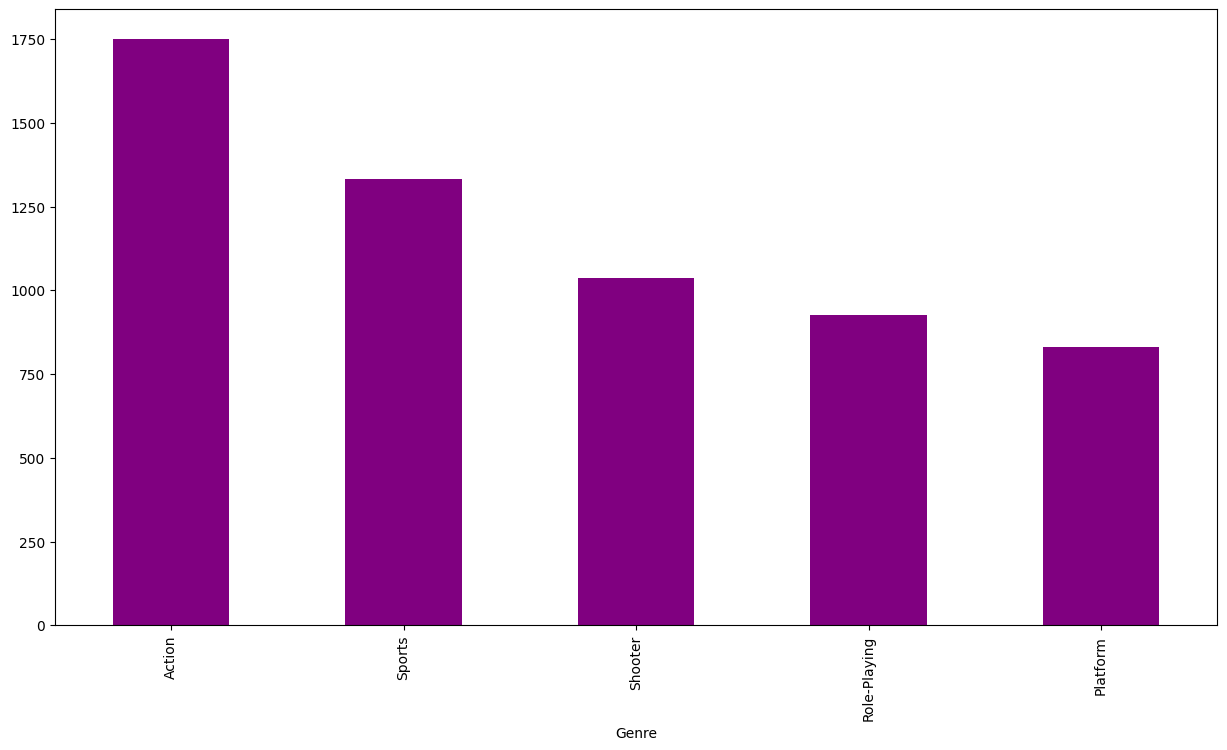

In [113]:
Genre_Sales=df.groupby(['Genre']) ['Global_Sales'].sum().sort_values(ascending=False)
Genre_Sales.head(5).plot(kind='bar',color='purple',figsize=(15,8))

Insights:
- Highest frequency in Genre are- Action- 3251 then Sports-  2304
- Highest sales in Genre are- Action-  1751.18 million then Sports- 1330.93 million

# 4. Who are the top most publisher,platform, and global sales number per year, total sales?

In [114]:
final.Publisher.value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [130]:
Publisher=df.groupby(['Publisher']) ['Global_Sales'].sum().sort_values(ascending=False)
Publisher.head(5)

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
Name: Global_Sales, dtype: float64

<AxesSubplot: xlabel='Publisher'>

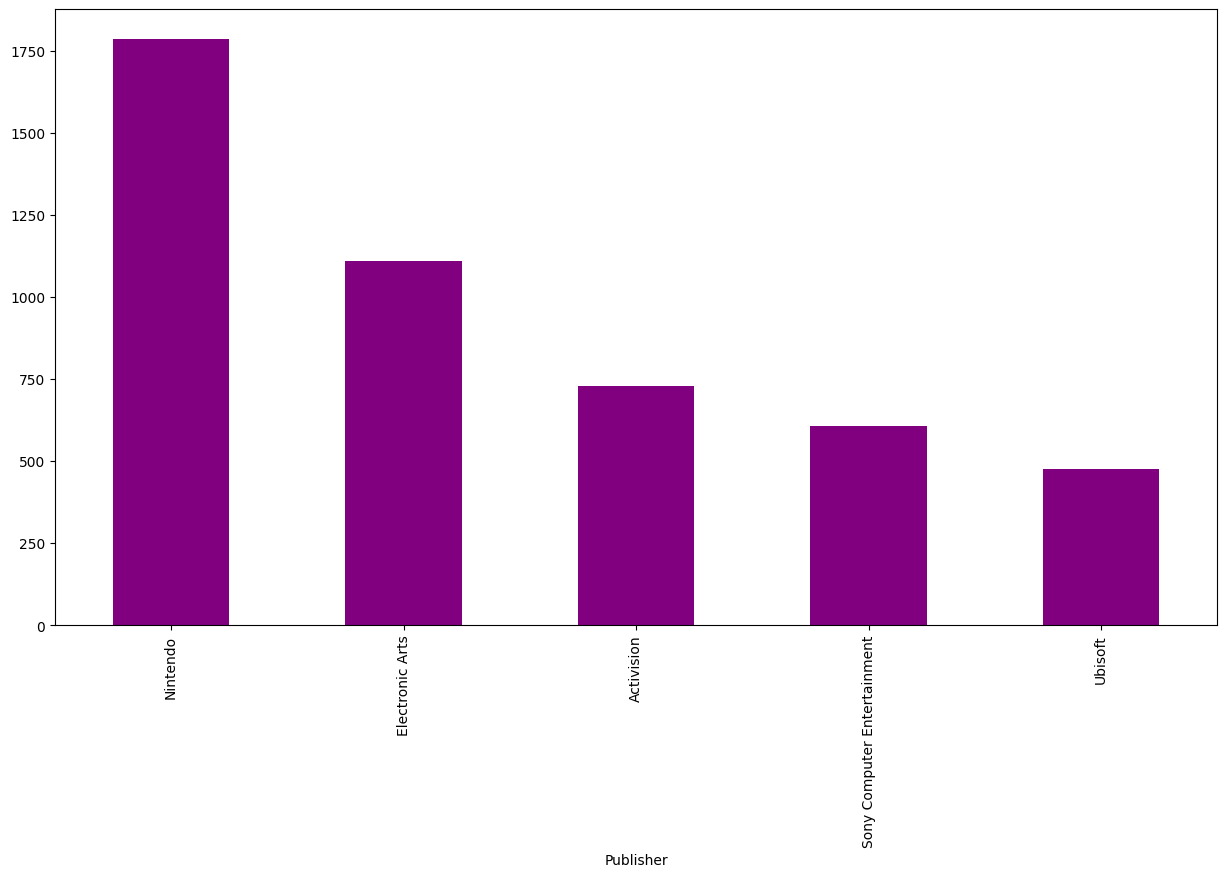

In [131]:
Publisher.head(5).plot(kind='bar',color='purple',figsize=(15,8))

In [116]:
final.Platform.value_counts().head(10)

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: Platform, dtype: int64

In [128]:
Platform=df.groupby(['Platform']) ['Global_Sales'].sum().sort_values(ascending=False)
Platform.head()


Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64

<AxesSubplot: xlabel='Platform'>

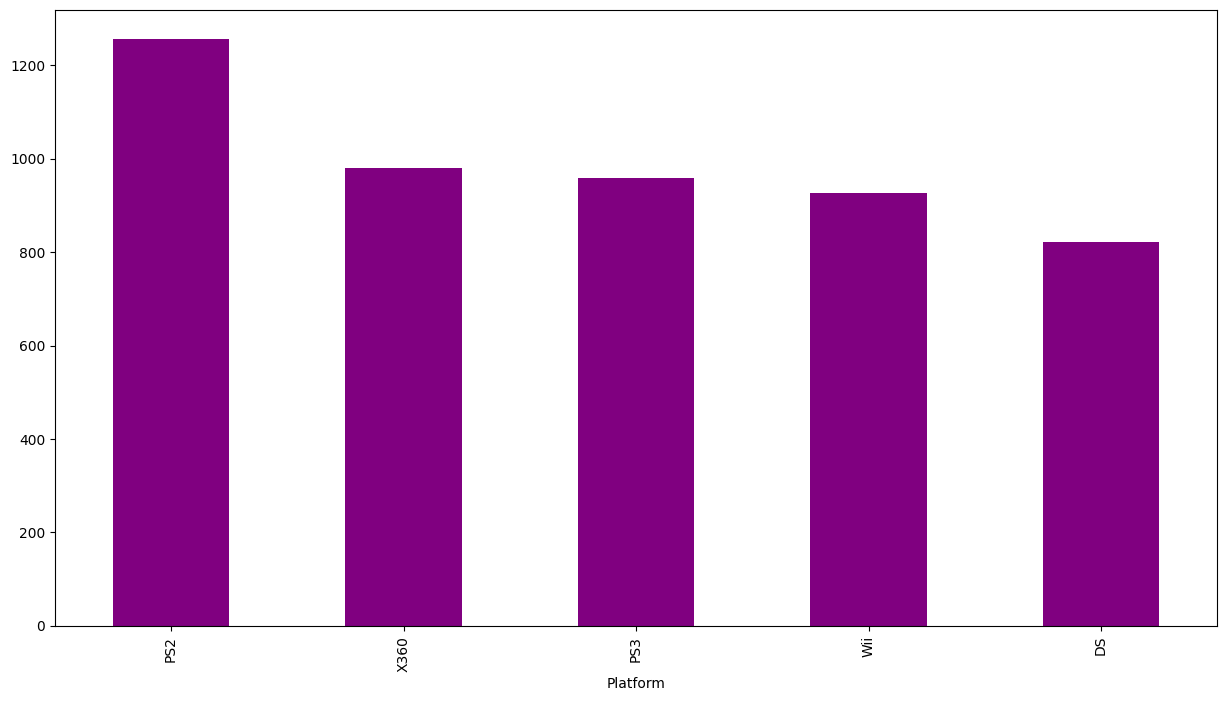

In [129]:
Platform.head(5).plot(kind='bar',color='purple',figsize=(15,8))

In [118]:
total_sales=df.groupby(['Year']) ['Global_Sales'].sum().sort_values(ascending=False)
total_sales.head(10)


Year
2008.0    678.90
2009.0    667.30
2007.0    611.13
2010.0    600.45
2006.0    521.04
2011.0    515.99
2005.0    459.94
2004.0    419.31
2002.0    395.52
2013.0    368.11
Name: Global_Sales, dtype: float64

<AxesSubplot: xlabel='Year'>

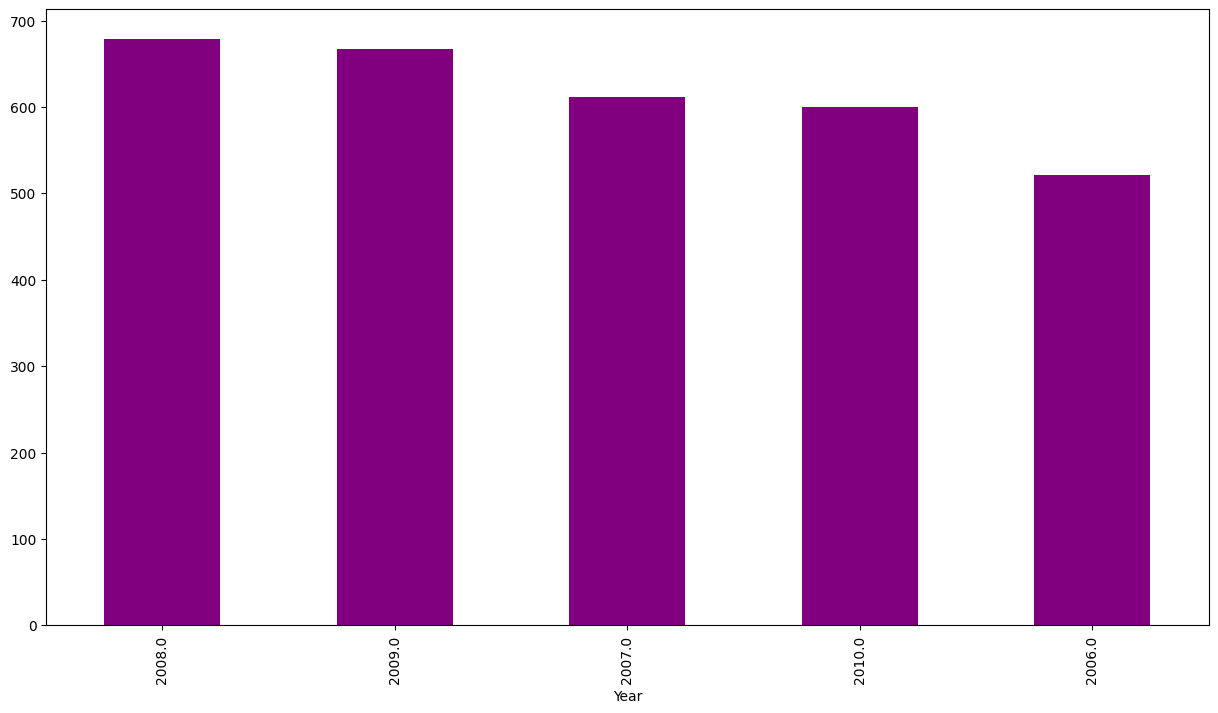

In [119]:
total_sales.head(5).plot(kind='bar',color='purple',figsize=(15,8))

In [120]:
final.Global_Sales.sum()

8811.97

Insights:
- Total Revenue from video game- 8811.97 million (in 40 years)
- Highest Games published by Electronic Arts but sales from Nintendo- 1786.56 million.
- Highest sales from platform-> PS2-255.64 million
- Highest game sales in 2009 but profile year is 2008-678.90 million

# Conclusion

 * The year **2009 (1431)** had a higher frequency than **2008 (1428) **in the game sales dataset.
* The game "**Wii Sports"** had the**highest sales** in all regions except for Japan, where "Pokemon Red/Pokemon Blue" was the highest selling game.
* The game genre with the **highest frequency was Action**, followed by Sports. The genre with the highest sales was also Action, followed by Sports.
* The **total revenue** from video games over 40 years was **8811.97 million**.
* Although Electronic Arts published the highest number of games, the **highest sales were from Nintendo**.
* The platform with the highest game sales was PS2, and the **highest game sales in a year (2008) with 678.90 million** in sales.

# Suggession to Client:

* Consider investing in game genres that have a high frequency and high sales, such as Action and Sports.
* Partner with publishers who have a proven track record of high game sales, such as Nintendo.
* Consider developing games for platforms that have historically had high game sales, such as PS2.
* Evaluate the market demand and opportunities for games in regions where the highest selling games differ from the global trend, such as Japan.
* Monitor changes in game sales frequency and adapt to market trends to remain competitive in the industry.
* Focus on delivering high-quality games that appeal to a broad audience to increase the likelihood of high sales.

### ********************************Thank you for watching************************************ 
![](https://etiquettejulie.com/wp-content/uploads/2017/01/thank-you-from-christian-vision-alliance.jpg)